In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from angle_accomodation import AngleAnnotation

In [2]:
masa_1 = [30,30,50,30,30]
angulo_1 = [0,0,45,45,60]
masa_2 = [30,50,30,30,30]
angulo_2 = [90,90,180,135,120]
masa_3 =[43.2,58.3,35.4,43.2,53.4]
angulo_3 = [224,239,261,266,270]

In [3]:
tabla = pd.DataFrame({'Medida': ['1', '2', '3', '4', '5'], 'Masa 1 (g)': masa_1, 'Ángulo 1 (°)': angulo_1, 'Masa 2 (g)': masa_2, 'Ángulo 2 (°)': angulo_2, 'Masa 3 (g)': masa_3, 'Ángulo 3 (°)': angulo_3})
tabla

,Medida,Masa 1 (g),Ángulo 1 (°),Masa 2 (g),Ángulo 2 (°),Masa 3 (g),Ángulo 3 (°)
0,1,30,0,30,90,43.2,224
1,2,30,0,50,90,58.3,239
2,3,50,45,30,180,35.4,261
3,4,30,45,30,135,43.2,266
4,5,30,60,30,120,53.4,270


In [4]:
def fuerza(m):
    f = m*(9.8)
    return f

f_1 = [fuerza(masa_1[0]), fuerza(masa_2[0]), fuerza(masa_3[0])]
f_2 = [fuerza(masa_1[1]), fuerza(masa_2[1]), fuerza(masa_3[1])]
f_3 = [fuerza(masa_1[2]), fuerza(masa_2[2]), fuerza(masa_3[2])]
f_4 = [fuerza(masa_1[3]), fuerza(masa_2[3]), fuerza(masa_3[3])]
f_5 = [fuerza(masa_1[4]), fuerza(masa_2[4]), fuerza(masa_3[4])]

In [5]:
tabla_fuerza = pd.DataFrame({'Medida': ['1', '2', '3', '4', '5'], 'Fuerza 1 (N)': [f_1[0], f_2[0], f_3[0], f_4[0], f_5[0]], 'Fuerza 2 (N)': [f_1[1], f_2[1], f_3[1], f_4[1], f_5[1]], 'Fuerza 3 (N)': [f_1[2], f_2[2], f_3[2], f_4[2], f_5[2]]})
tabla_fuerza

,Medida,Fuerza 1 (N),Fuerza 2 (N),Fuerza 3 (N)
0,1,294.0,294.0,423.36
1,2,294.0,490.0,571.34
2,3,490.0,294.0,346.92
3,4,294.0,294.0,423.36
4,5,294.0,294.0,523.32


In [12]:
def add_vector_labels(ax, angles, magnitudes, labels, colors):
    for angle, magnitude, label, color in zip(angles, magnitudes, labels, colors):
        ax.quiver(0, 0, np.radians(angle), magnitude, color=color, scale=1, scale_units='xy', angles='xy', width=0.013, headwidth=4)
        ax.text(np.radians(angle), magnitude+70, label, color='black', fontsize=18, ha='right', va='bottom')


In [21]:
def angulos_vector(ax,angulos):
    l = 100
    for i in zip(angulos):
        an = np.arange(0, np.radians(i),0.1)
        ban = np.repeat(l,np.size(an))
        ax.plot(an , ban, color='black', linestyle='-', linewidth=0.8)
        l= l+100

/tmp/ipykernel_5027/4049318816.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  an = np.arange(0, np.radians(i),0.1)
/tmp/ipykernel_5027/4049318816.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  an = np.arange(0, np.radians(i),0.1)
/tmp/ipykernel_5027/4049318816.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  an = np.arange(0, np.radians(i),0.1)
/tmp/ipykernel_5027/4049318816.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is 

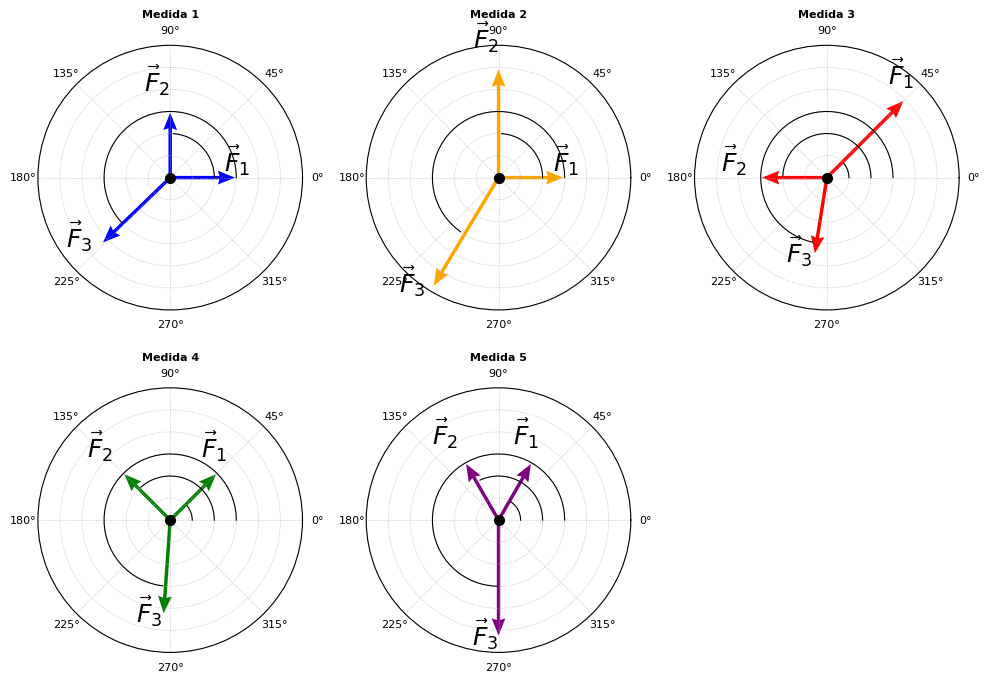

In [24]:
fig = plt.figure(figsize=(10, 7), layout='tight')
spec = fig.add_gridspec(2,3)
ax1 = fig.add_subplot(spec[0,0], projection='polar')
ax1.set_title('Medida 1',size = 8, weight = 'bold')
ax1.set_theta_direction(1)
ax1.set_theta_zero_location('E')
ax1.set_ylim(0, 600)
ax1.set_yticklabels([])
ax1.tick_params(axis='x',labelsize=8, length=0)
ax1.plot(0, 1, color='black', marker='o', markersize=7)
ax1.grid(True, linestyle=':', linewidth=0.5)
angulos_vector(ax1,[angulo_1[0], angulo_2[0], angulo_3[0]])  
#a = np.arange(0, np.radians(angulo_1[0]), 0.1)
#b = np.repeat(100, np.size(a))
#a_1 = np.arange(0, np.radians(angulo_2[0]), 0.1)
#b_1 = np.repeat(200, np.size(a_1))
#a_2 = np.arange(0, np.radians(angulo_3[0]), 0.1)
#b_2 = np.repeat(300, np.size(a_2))
#ax1.plot(a , b, color='black', linestyle='-', label='Fuerza 1', linewidth=0.8)
#ax1.plot(a_1, b_1, color='black', linestyle='-', label='Fuerza 2',linewidth=0.8)
#ax1.plot(a_2, b_2, color='black', linestyle='-', label='Fuerza 3',linewidth=0.8)
# ax1.quiver(0, 0, np.radians(angulo_1[0]), f_1[0], color='blue', scale=1, scale_units='xy', angles='xy',width=0.013, headwidth=4)
# ax1.text(np.radians(angulo_1[0]), 200, label=r'$\vec{F}_{1}$', color='black', fontsize=14, ha='left', va='bottom')
#ax1.quiver(0, 0, np.radians(angulo_2[0]), f_1[1], color='blue', scale=1, scale_units='xy', angles='xy',width=0.013, headwidth=4)
#ax1.quiver(0, 0, np.radians(angulo_3[0]), f_1[2], color='blue', scale=1, scale_units='xy', angles='xy',width=0.013, headwidth=4)
# ax1.set_rlabel_position(-22.5) 
add_vector_labels(ax1, [angulo_1[0], angulo_2[0], angulo_3[0]], f_1, [r'$\vec{F}_{1}$', r'$\vec{F}_{2}$', r'$\vec{F}_{3}$'], ['blue', 'blue', 'blue'])
ax2 = fig.add_subplot(spec[0,1], projection='polar')
ax2.set_title('Medida 2',size = 8, weight = 'bold')
ax2.set_theta_direction(1)
ax2.set_theta_zero_location('E')
ax2.set_ylim(0, 600)
ax2.set_yticklabels([])
ax2.tick_params(axis='x',labelsize=8, length=0)
ax2.plot(0, 1, color='black', marker='o', markersize=7)
ax2.grid(True, linestyle=':', linewidth=0.5)
#a = np.arange(0, np.radians(angulo_1[1]), 0.1)
#b = np.repeat(100, np.size(a))
#a_1 = np.arange(0, np.radians(angulo_2[1]), 0.1)
#b_1 = np.repeat(200, np.size(a_1))
#a_2 = np.arange(0, np.radians(angulo_3[1]), 0.1)
#b_2 = np.repeat(300, np.size(a_2))
#ax2.plot(a , b, color='black', linestyle='-', label='Fuerza 1', linewidth=0.8)
#ax2.plot(a_1, b_1, color='black', linestyle='-', label='Fuerza 2',linewidth=0.8)
#ax2.plot(a_2, b_2, color='black', linestyle='-', label='Fuerza 3',linewidth=0.8)
#ax2.quiver(0, 0, np.radians(angulo_1[1]), f_2[0], color='orange', scale=1, scale_units='xy', angles='xy',width=0.013, headwidth=4)
#ax2.quiver(0, 0, np.radians(angulo_2[1]), f_2[1], color='orange', scale=1, scale_units='xy', angles='xy',width=0.013, headwidth=4)
#ax2.quiver(0, 0, np.radians(angulo_3[1]), f_2[2], color='orange', scale=1, scale_units='xy', angles='xy',width=0.013, headwidth=4)
angulos_vector(ax2,[angulo_1[1], angulo_2[1], angulo_3[1]])
add_vector_labels(ax2, [angulo_1[1], angulo_2[1], angulo_3[1]], f_2, [r'$\vec{F}_{1}$', r'$\vec{F}_{2}$', r'$\vec{F}_{3}$'], ['orange', 'orange', 'orange'])
ax3 = fig.add_subplot(spec[0,2], projection='polar')
ax3.set_title('Medida 3',size = 8, weight = 'bold')
ax3.set_theta_direction(1)
ax3.set_theta_zero_location('E')
ax3.set_ylim(0, 600)
ax3.set_yticklabels([])
ax3.tick_params(axis='x',labelsize=8, length=0)
ax3.plot(0, 1, color='black', marker='o', markersize=7)
ax3.grid(True, linestyle=':', linewidth=0.5)
#a = np.arange(0, np.radians(angulo_1[2]), 0.1)
#b = np.repeat(100, np.size(a))
#a_1 = np.arange(0, np.radians(angulo_2[2]), 0.1)
#b_1 = np.repeat(200, np.size(a_1))
#a_2 = np.arange(0, np.radians(angulo_3[2]), 0.1)
#b_2 = np.repeat(300, np.size(a_2))
#ax3.plot(a , b, color='black', linestyle='-', linewidth=0.8, label=r'$\theta = 0 ^{\circ}$')
#ax3.plot(a_1, b_1, color='black', linestyle='-', label='Fuerza 2',linewidth=0.8)
#ax3.plot(a_2, b_2, color='black', linestyle='-', label='Fuerza 3',linewidth=0.8)
#ax3.quiver(0, 0, np.radians(angulo_1[2]), f_3[0], color='red', scale=1, scale_units='xy', angles='xy',width=0.013, headwidth=4)
#ax3.quiver(0, 0, np.radians(angulo_2[2]), f_3[1], color='red', scale=1, scale_units='xy', angles='xy',width=0.013, headwidth=4)
#ax3.quiver(0, 0, np.radians(angulo_3[2]), f_3[2], color='red', scale=1, scale_units='xy', angles='xy',width=0.013, headwidth=4)
angulos_vector(ax3,[angulo_1[2], angulo_2[2], angulo_3[2]])
add_vector_labels(ax3, [angulo_1[2], angulo_2[2], angulo_3[2]], f_3, [r'$\vec{F}_{1}$', r'$\vec{F}_{2}$', r'$\vec{F}_{3}$'], ['red', 'red', 'red'])
ax4 = fig.add_subplot(spec[1,0], projection='polar')
ax4.set_title(r'''Medida 4''',size = 8, weight = 'bold')
ax4.set_theta_direction(1)
ax4.set_theta_zero_location('E')
ax4.set_ylim(0, 600)
ax4.set_yticklabels([])
ax4.tick_params(axis='x',labelsize=8, length=0)
ax4.plot(0, 1, color='black', marker='o', markersize=7)
ax4.grid(True, linestyle=':', linewidth=0.5)
#a = np.arange(0, np.radians(angulo_1[3]), 0.1)
#b = np.repeat(100, np.size(a))
#a_1 = np.arange(0, np.radians(angulo_2[3]), 0.1)
#b_1 = np.repeat(200, np.size(a_1))
#a_2 = np.arange(0, np.radians(angulo_3[3]), 0.1)
#b_2 = np.repeat(300, np.size(a_2))
#ax4.plot(a , b, color='black', linestyle='-', label='Fuerza 1', linewidth=0.8)
#ax4.plot(a_1, b_1, color='black', linestyle='-', label='Fuerza 2',linewidth=0.8)
#ax4.plot(a_2, b_2, color='black', linestyle='-', label='Fuerza 3',linewidth=0.8)
#ax4.quiver(0, 0, np.radians(angulo_1[3]), f_4[0], color='green', scale=1, scale_units='xy', angles='xy',width=0.013, headwidth=4)
#ax4.quiver(0, 0, np.radians(angulo_2[3]), f_4[1], color='green', scale=1, scale_units='xy', angles='xy',width=0.013, headwidth=4)
#ax4.quiver(0, 0, np.radians(angulo_3[3]), f_4[2], color='green', scale=1, scale_units='xy', angles='xy',width=0.013, headwidth=4)
angulos_vector(ax4,[angulo_1[3], angulo_2[3], angulo_3[3]])
add_vector_labels(ax4, [angulo_1[3], angulo_2[3], angulo_3[3]], f_4, [r'$\vec{F}_{1}$', r'$\vec{F}_{2}$', r'$\vec{F}_{3}$'], ['green', 'green', 'green'])
ax5 = fig.add_subplot(spec[1,1], projection='polar')
ax5.set_title(r''' Medida 5 ''',size = 8, weight = 'bold')
ax5.set_theta_direction(1)
ax5.set_theta_zero_location('E')
ax5.set_ylim(0, 600)
ax5.set_yticklabels([])
ax5.tick_params(axis='x',labelsize=8, length=0)
ax5.plot(0, 1, color='black', marker='o', markersize=7)
ax5.grid(True, linestyle=':', linewidth=0.5)
#a = np.arange(0, np.radians(angulo_1[4]), 0.1) 
#b = np.repeat(100, np.size(a))
#a_1 = np.arange(0, np.radians(angulo_2[4]), 0.1)
#b_1 = np.repeat(200, np.size(a_1))
#a_2 = np.arange(0, 4.8, 0.1)
#b_2 = np.repeat(300, 48)
#ax5.plot(a , b, color='black', linestyle='-', label='Fuerza 2', linewidth=0.8)
#ax5.plot(a_1, b_1, color='black', linestyle='-', label='Fuerza 2',linewidth=0.8)
#ax5.plot(a_2, b_2, color='black', linestyle='-', label='Fuerza 2',linewidth=0.8)
#ax5.quiver(0, 0, np.radians(angulo_1[4]), f_5[0], color='purple', scale=1, scale_units='xy', angles='xy', label='Fuerza 1', width=0.013, headwidth=4)
#ax5.quiver(0, 0, np.radians(angulo_2[4]), f_5[1], color='purple', scale=1, scale_units='xy', angles='xy', label='Fuerza 2', width=0.013, headwidth=4)
#ax5.quiver(0, 0, np.radians(angulo_3[4]), f_5[2], color='purple', scale=1, scale_units='xy', angles='xy', label='Fuerza 3', width=0.013, headwidth=4)
angulos_vector(ax5,[angulo_1[4], angulo_2[4], angulo_3[4]])
add_vector_labels(ax5, [angulo_1[4], angulo_2[4], angulo_3[4]], f_5, [r'$\vec{F}_{1}$', r'$\vec{F}_{2}$', r'$\vec{F}_{3}$'], ['purple', 'purple', 'purple'])

plt.show()